In [1]:
#Modulos requeridos
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def advection_linear(a, L, n, dt, tf):
    '''
    Esta función calcula la advección lineal
    input: alpha o a (velocidad)
    L :longitud de grilla
    n: discretizaciojn de grilla
    dt: paso tiempo
    tf: tiempo final
    '''
    # Construimos la grilla
    dx = L/n # discretización de grilla
    x = np.linspace(0, L - dx, n)# 

    # Solución inicial
    u = np.exp(-40*(x-1/2)**2)
    ut_mas_dt = np.zeros(u.shape)

    # Avance de la solución de tiempo
    t = 0
    while(t < tf):
        for i in range(n):
            # condicion de borde para función periodica
            if i == 0:
                ut_mas_dt[i] = u[i] - a*dt/dx*(u[i] - u[n - 1]) #ingreses una condición incial
            else:
                ut_mas_dt[i] = u[i] - a*dt/dx*(u[i] - u[i - 1])
        
        
        u[:] = ut_mas_dt[:]
        t += dt
        
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()
   

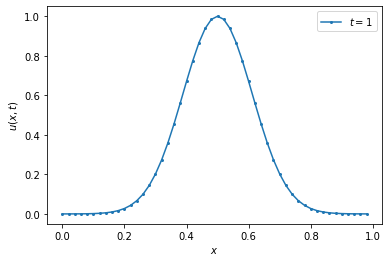

In [3]:
plt.figure(0)

# asignamos variables
a = 1 #m/s
L = 1 # m
n =  50
dt = 0.02 #eltatimepo en s
tf = 1 #s

advection_linear(a, L, n, dt, tf)

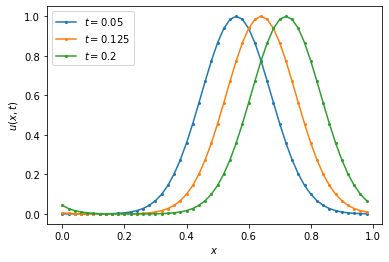

In [4]:
rango =  np.linspace(0.05, 0.2, 3, endpoint=True)

for tf in rango:
    advection_linear(a, L, n, dt, tf)

In [5]:
def burgers(L, n, dt, tf):
    # Build grid
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Initialize solution
    u = np.exp(-40*(x-1/2)**2)
    ut = np.zeros(u.shape)

    # Advance solution in time
    t = 0
    while(t < tf):
        for i in range(n):
            # Enforce periodic boundary condition at x=0
            if i == 0:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[n-1]**2)
            else:
                ut[i] = u[i] - 0.5*dt/dx * (u[i]**2-u[i-1]**2)

        u[:] = ut[:]
        t += dt
        
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

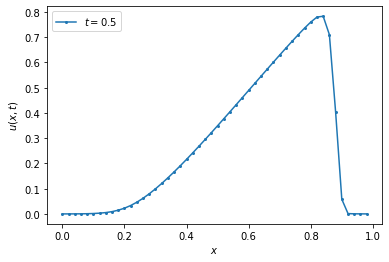

In [6]:
plt.figure(0)

# asignamos datos
L = 1
n = 50
dt = 0.005
tf = 0.5

burgers(L, n, dt, tf)

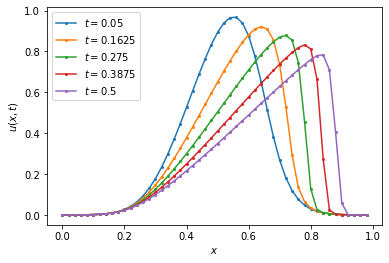

In [7]:
rango =  np.linspace(0.05, 0.5, 5, endpoint=True)

for tf in rango:
    burgers(L, n, dt, tf)

In [8]:
def diffusion_linear(b, L, n, dt, tf):
    # construimos grilla
    dx = L/n
    x = np.linspace(0, L - dx, n)
    
    # Solución inicial
    u = np.exp(-40*(x - 1/2)**2)
    ut = np.zeros(u.shape)

    # avance solución de tiempo
    t = 0
    c = b*dt/dx**2
    while(t < tf):
        for i in range(n):
            if i == 0:
                # condición de frontera periodica x=0
                ut[i] = u[i] + c*(u[n - 1] - 2*u[i] + u[i + 1])
            elif i == n - 1:
                # condición de frontera periodica x=L
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[0])
            else:
                ut[i] = u[i] + c*(u[i - 1] - 2*u[i] + u[i + 1])
        u[:] = ut[:]
        t += dt
    
    plt.plot(x, u, 'o-', markersize=2, label=f'$t={tf}$')
    plt.xlabel('$x$')
    plt.ylabel('$u(x,t)$')
    plt.legend()

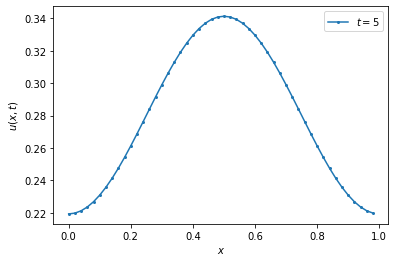

In [9]:
plt.figure(0)

# asignamos las variables
b = 1e-2
L = 1
n = 50
dt = 0.001
tf = 5

diffusion_linear(b, L, n, dt, tf)

In [10]:
rango =  np.linspace(1, 5, 5, endpoint=True)

for tf in rango:
    diffusion_linear(b, L, n, dt, tf)